In [4]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
import pandas as pd
from scipy import integrate
import numpy.matlib
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics
  
from operator import add
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 5


### OD to concentration calibration 

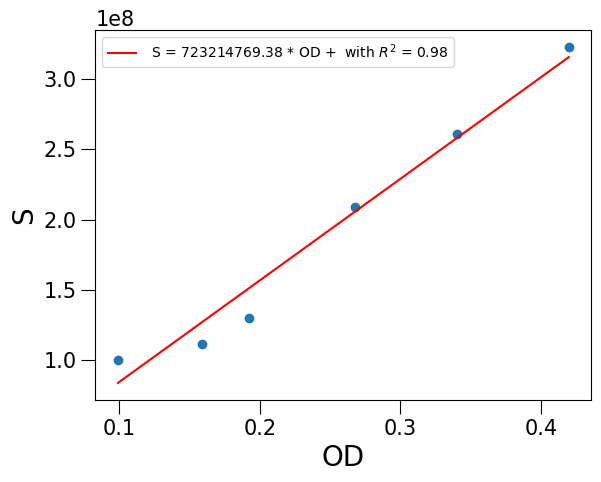

In [6]:
def func(x, a):
    return a * x + (1.2*10**7)
OD = np.array( [0.099,0.159,0.192,0.268,0.34,0.42])
S = np.array([9.97E+07,1.11E+08,1.30E+08,2.09E+08,2.61E+08,3.23E+08])
plt.scatter(OD,S)
plt.xlabel('OD')
plt.ylabel('S')
x=OD
y=S
popt, pcov = curve_fit(func, x, y)

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
                 
plt.plot(x, func(x, *popt), 'r-', label= " S = " +str(round(popt[0],2)) + ' * OD + '+  r' with $R^{2}$ = ' + str(round(r_squared,2)) )
plt.legend()
xx=np.array(x[1:len(x)-1]) # your list of values goes in there

### Fig 3c: Applying calibration conversion function to get infection curves in terms of concentration

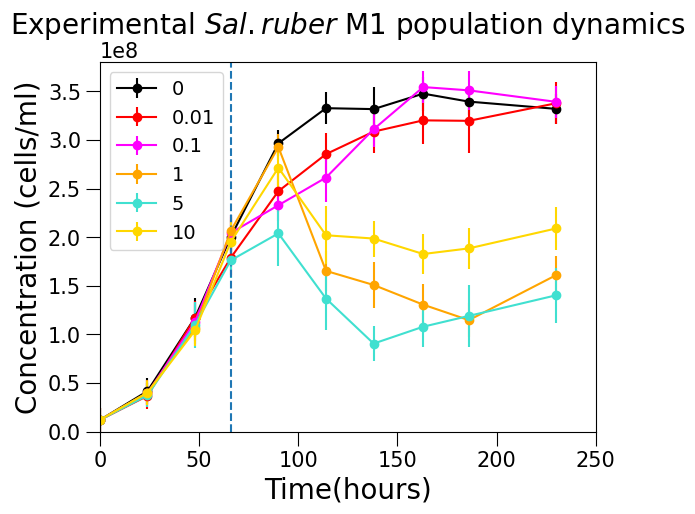

In [8]:
colors = ['red','fuchsia','orange','turquoise','gold']

OD_data =[ 0,0.041,0.145666667,0.260333333,0.393333333,0.443333333,0.442,0.464,0.452666667,0.442333333]
error_0 = [0,0.001732051,0.01134803,0.014518188,0.001763834,0.006565905,0.015011107,0.007571878,0.002403701,0.004484541]

OD_data_001 =[0,0.034333333,0.145666667,0.230666667,0.325333333,0.378,0.41,0.426,0.425333333,0.450333333]
error_001 = [0,0.002333333,0.006741249,0.007535103,0.012719189,0.014,0.013856406,0.017009801,0.02944675,0.01299145]

OD_data_01 = [0,0.038,0.139666667,0.266,0.305333333,0.344666667,0.413333333,0.473333333,0.468666667,0.452333333]
error_01 =[0,0.002081666,0.01065103,0.008962886,0.005333333,0.018487233,0.008353309,0.006666667,0.011623731,0.006385748]

OD_data_1 = [0,0.039,0.131,0.269,0.388,0.212,0.192,0.164,0.142,0.206]
error_1 = [0,0.001,0.005897269,0.002962731,0.001763834,0.011718931,0.016384274,0.012346839,0.007571878,0.011170397]


OD_data_5= [0,0.035,0.135333333,0.227,0.265333333,0.172666667,0.108666667,0.132666667,0.148,0.177333333]
error_5 = [0,0.00057735,0.016505891,0.008717798,0.029310597,0.028339215,0.00851143,0.011794537,0.027153882,0.022430138]

OD_data_10 =[0,0.038666667,0.127333333,0.253333333,0.358666667,0.262666667,0.258,0.236,0.244,0.272333333]
error_10 = [0,0.000881917,0.004977728,0.014903393,0.023132469,0.024828299,0.0090185,0.012489996,0.012858201,0.014621141]


t = [0,24,48,66,90,114,138,163,186,230]
x1=t
y1=OD_data
MOI_vals_labels = [0,0.01,0.1,1,5,10]

OD_data_err = np.array(error_0)
OD_data_err_001 = np.array(error_001)
OD_data_err_01 = np.array(error_01)
OD_data_err_1 = np.array(error_1)
OD_data_err_5 = np.array(error_5)
OD_data_err_10 = np.array(error_10)

S_control_error = func(OD_data_err, *popt)
S_error_001 = func(OD_data_err_001, *popt)
S_error_01 = func(OD_data_err_01, *popt)
S_error_1 = func(OD_data_err_1, *popt)
S_error_5 = func(OD_data_err_5, *popt)
S_error_10 = func(OD_data_err_10, *popt)

OD_data_arr = np.array(OD_data)
S_control_data = func(OD_data_arr, *popt)
plt.errorbar(x1,S_control_data,S_control_error,marker='o', color = 'black')

OD_data_001 = np.array(OD_data_001)
data_001=func(OD_data_001, *popt)
plt.errorbar(x1,data_001,S_error_001,marker='o', color = colors[0])

OD_data_01 = np.array(OD_data_01)
data_01=func(OD_data_01, *popt)
plt.errorbar(x1,data_01,S_error_01,marker='o', color = colors[1])


OD_data_1 = np.array(OD_data_1)
data_1=func(OD_data_1, *popt)
plt.errorbar(x1,data_1,S_error_1,marker='o', color = colors[2])


OD_data_5 = np.array(OD_data_5)
data_5=func(OD_data_5, *popt)
plt.errorbar(x1,data_5,S_error_5,marker='o',color = colors[3])



OD_data_10 = np.array(OD_data_10)
data_10=func(OD_data_10, *popt)
plt.errorbar(x1,data_10,S_error_10,marker='o', color = colors[4])



plt.title(r'Experimental $\it{Sal.ruber}$ M1 population dynamics', fontsize = 20)
plt.legend(MOI_vals_labels, fontsize = 14)
plt.axvline(66, linestyle = '--')
plt.ylabel('Concentration (cells/ml)')
plt.xlabel('Time(hours)')
plt.ylim(0,3.8*10**8)
plt.xlim(0,250)
plt.savefig("Experimental.png", bbox_inches = "tight")

### Fig S1: Defining how the latent period varies as a function of cell MOI 

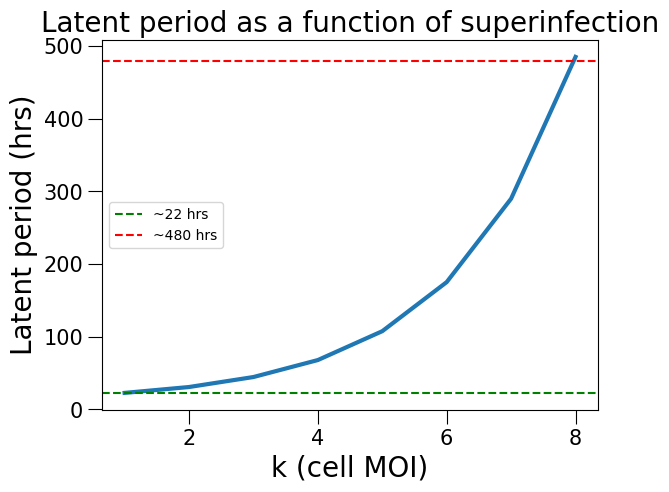

In [10]:
pars={}
pars['n'] = 8
MOI = np.arange(pars['n']) +1
vals = np.arange(pars['n']) 
mat =  [[0]*pars['n']]*pars['n']
for i in vals:
    for j in vals:
        mat[i][j] = (1/(2+j))
pars['fin'] = np.triu(mat, k=0)
pars['e'] = 0.75*10**-7
pars['R_in'] =8
pars['R0'] = 25

MOI = np.arange(pars['n']) +1 
q = 0
pars['q'] = 1-(1-q)**MOI 

phi_values = []
eta_values = []
lam_values = []
beta_values = []
lam_initial = 1/6.8
pars['eta'] = 1/11
pars['a'] = 1.7
#MOI = np.linspace(0,pars['n'],1000)
lat_per = []
MOI = np.arange(pars['n']) +1
#MOI = np.linspace(0,pars['n'],1000)
for i in MOI:
    lam_value =lam_initial/((pars['a'])**i)
    if 1/lam_value + 1/pars['eta'] < 550:
        lam_values.append(lam_value)
        threshold_lam = lam_value
    else:
        lam_values.append(threshold_lam)
for i in lam_values:
    lat_per.append(1/i + 1/pars['eta'])
plt.plot(MOI,lat_per, linewidth=3.0)
plt.axhline(22, linestyle = '--', color = 'green', label = '~22 hrs')
plt.axhline(480, linestyle = '--', color = 'red', label = '~480 hrs')
plt.ylabel('Latent period (hrs)')
plt.xlabel('k (cell MOI)')
plt.legend()
plt.title('Latent period as a function of superinfection', fontsize =20)
plt.savefig('LP.pdf', bbox_inches = "tight")

## Main Model 

In [12]:
def Model_2(y,t,pars):
    if pars['n'] == 0:
        return ('Need n>0 classes')
    if pars['n'] == 1:
        dy= np.zeros(5)
        R = y[0]
        S = y[1]
        E = y[2]
        I = y[3]
        V = y[4]
        
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim =1
        
        dy[0] = pars['J'] - pars['e']* psy_R*(S+E) #R
        dy[1] = psy_R * S  - pars['phi'][0] * S* V +psy_R*E + psy_R*I #S
        dy[2] = pars['phi'][0] * S* V  - pars['lam'][0]*E  #E
        dy[3] = pars['lam'][0]*E - psy_R_dim*(pars['eta'] * I) #I
        dy[4] = psy_R_dim*(pars['bet']*pars['eta'] * I) - (pars['phi'][0]*S + pars['phi'][0]*E)* V #V
        
        return dy  
    else:
        dy = np.zeros(2*pars['n']+3)
        R = y[0]
        S = y[1]
        Pe_1 = y[2]
        Pe_s = y[3:(pars['n']+1)]
        Pe_k = y[pars['n'] + 1]
        Pf_1 = y[pars['n']+2]
        Pf_s = y[(pars['n']+3):(2*pars['n']+1)]
        Pf_k = y[2*pars['n'] + 1]
        V = y[2*pars['n'] + 2]

        Pe_prev = np.concatenate((Pe_1 ,  Pe_s[0:-1]), axis = None)
        Pe_total = np.concatenate((Pe_1 ,  Pe_s, Pe_k), axis = None)
        
        Pe_sum = np.sum(Pe_total)
        
        Pf_prev = np.concatenate((Pf_1 ,  Pf_s[0:-1]), axis = None)
        Pf_total = np.concatenate((Pf_1 ,  Pf_s, Pf_k), axis = None)
        
        Pf_sum = np.sum(Pf_total)

 
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))

        Pe_topmid = np.concatenate((Pe_1 ,  Pe_s), axis = None)
        Pf_topmid = np.concatenate((Pf_1 ,  Pf_s), axis = None)
  
        
        
        lam_sum = np.sum(pars['lam'])


        dy[0] = pars['J'] - pars['e']* psy_R*(S +(1/(1-pars['alpha_p'])) * ((np.sum(Pe_total))+np.sum(Pf_total))) - pars['dR'] * R #R
        #print(pars['fin'][1:-1])
        #print(Pe_total)
     
        dy[1] = psy_R * S  - pars['phi'][0]  * S* V   + 2* psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*Pe_total)) + 2* psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*Pf_total)) - pars['dS']*S # S

        dy[2] = pars['phi'][0] * S * V - pars['phi'][1] * Pe_1 * V  -  (pars['lam'][0] * Pe_1) - (psy_R)*Pe_1 + 1/(1-pars['alpha_p'])*2*psy_R*np.sum(pars['fin'][0]*(Pe_total), axis = 0)-  pars['dE'] * Pe_1  #Pe_1

        dy[3:(pars['n']+1)]  = pars['phi'][1:-2] * Pe_prev * V - pars['phi'][2:-1] * Pe_s * V -  (pars['lam'][1:-1] * Pe_s) -(psy_R)*Pe_s + 2*psy_R * np.sum(pars['fin'][1:-1]*Pe_total, axis = 1)/(1-pars['alpha_p'])- pars['dE'] * Pe_s  # Pe_s
        
        dy[pars['n']+1]  = pars['phi'][-1] * Pe_topmid[-1]*V -  (pars['lam'][-1] * Pe_k) -  (psy_R)*Pe_k +  2*psy_R*np.sum(pars['fin'][-1]*(Pe_k), axis = 0)/(1-pars['alpha_p'])-  pars['dE'] * Pe_k  #Pe_K

        dy[pars['n']+2] = pars['lam'][0]*Pe_1 - psy_R_dim * (pars['eta'] * (Pf_1)) -  (psy_R)*Pf_1 + 1/(1-pars['alpha_p'])*2*psy_R*np.sum(pars['fin'][0]*(Pf_total), axis = 0) #Pf_1
        
        dy[(pars['n']+3):(2*pars['n']+1)] = (pars['lam'][1:-1] * Pe_s) - psy_R_dim * (pars['eta'] * (Pf_s)) - (psy_R)*Pf_s + 2*psy_R * np.sum(pars['fin'][1:-1]*Pf_total, axis = 1)/(1-pars['alpha_p']) #Pf_s
        
        dy[2*pars['n'] + 1]= pars['lam'][-1]*Pe_k - psy_R_dim * (pars['eta'] * (Pf_k)) -  (psy_R)*Pf_k +  2*psy_R*np.sum(pars['fin'][-1]*(Pf_k), axis = 0)/(1-pars['alpha_p']) #Pf_k
        
        dy[2*pars['n']+2] = pars['bet']*psy_R_dim * (pars['eta'] * (Pf_sum))- V*(pars['phi'][0] * S + np.sum(pars['phi'][2:-1] * Pe_prev) + pars['phi'][-1] * Pe_topmid[-1]) - pars['dV'] * V #V
        
 
        
        #print(np.sum(pars['bet']*I*pars['eta']))
        #print(psy_R)
        return dy  

### Parameters used

In [14]:
pars={}

mu_max_vals=[0.06,0.06,0.06,0.06,0.06,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]

colors = ['black','red','fuchsia','orange','turquoise','gold']

mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
pars['n'] = 8
MOI = np.arange(pars['n']) +1
vals = np.arange(pars['n']) 
mat =  [[0]*pars['n']]*pars['n']

for i in vals:
    for j in vals:
        mat[i][j] = (1/(2+j))
pars['fin'] = np.triu(mat, k=0) #coefficients for pseudolysogenic replication (n/k+1)




pars['e'] = 0.75*10**-7 #conversion efficiency 
pars['mu_max'] = 0.06 #maximum growth rate of cells 
pars['R_in'] =8 #half saturation constant 
pars['R0'] = 25 #initial resource concentration


MOI = np.arange(pars['n']) +1 


phi_values = []
eta_values = []
lam_values = []
beta_values = []


lam_initial = 1/6.8
pars['eta'] = 1/11 #transition rate from singly infected early pseudolysogen to singly infected fully formed pseudolysogen 
pars['a'] = 1.7 #parameter that defines latent period as a function of superinfection 

#MOI = np.linspace(0,pars['n'],1000)

MOI = np.arange(pars['n']) +1
#MOI = np.linspace(0,pars['n'],1000)
for i in MOI:
    lam_value =lam_initial/((pars['a'])**i)
    if 1/lam_value + 1/pars['eta'] < 550:
        lam_values.append(lam_value)
        threshold_lam = lam_value
    else:
        lam_values.append(threshold_lam)



phi_initial = 4*10**-10 #adsoprtion rate         
phi_vals = [phi_initial]
for i in (vals+1):
    phi_vals.append(phi_initial)

phi_vals


#MOI = np.linspace(0,pars['n'],1000)


pars['sens']= 0.04 #viral sensitivity to resource levels 
pars['lam'] = lam_values #transition rates from early pseudolysogens to fully formed pseudolysogens 

pars['dR'] = 0 # decay rates for each compartment (all 0)
pars['dS'] = 0 
pars['dE'] = 0
pars['dL'] = 0
pars['dI'] = 0
pars['dV'] = 0
pars['bet'] = 10 #burst size
pars['phi'] = phi_vals #adsoprtion rate constant at 4 * 10**-10 for all cells
pars['alpha_s'] = 0 #selection coefficient for susceptibles in consuming resources 
pars['J'] = 0 #resource influx (kept at 0)
pars['res'] =1 #resistive advantage to pseudolysogens ( fully resistant = 0 , not resistant = 1)
pars['alpha_p'] =0#selective advantage for pseudolysogens in consuming resources

#print('woo')
t0 = 0 
tf = virus_insert_time #66 hour time insertion 
tstep = 0.1
t = np.arange(t0,tf+tstep,tstep)


### Model results assuming same initial growth of uninfected culture 

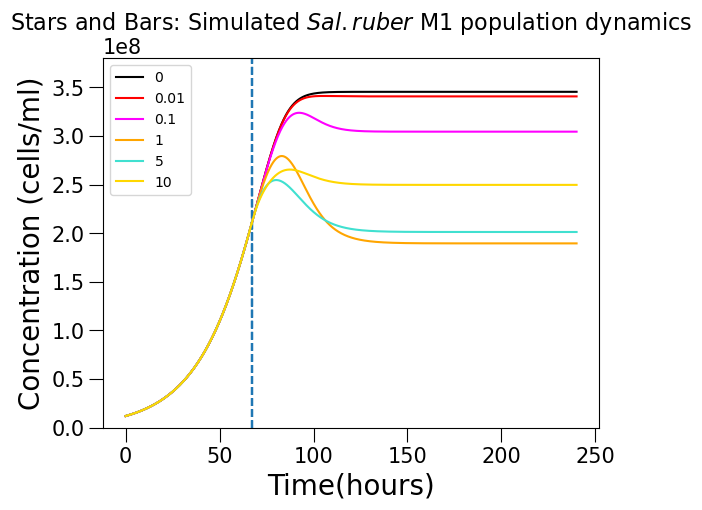

In [16]:
mu_max_vals=[0.06,0.06,0.06,0.06,0.06,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]
colors = ['black','red','fuchsia','orange','turquoise','gold']
mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
Rvals = []
Svals = []

Pf_finals = []
Pe_finals = []


Pe_dist_final=[]
for b in range(len(mu_max_vals)):
    pars['mu_max'] = mu_max_vals[b]
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    Pe1_0 = y1[:,2]
    Pe_mid_0 = y1[:,3:(pars['n']+1)]
    Pe_final_0 = y1[:,(pars['n']+1)]
    Pf1_0 = y1[:,pars['n']+2]
    Pf_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]

    Pe_total_mid_0 = np.sum(Pe_mid_0, axis = 1)
    Pf_total_mid_0 = np.sum(Pf_mid_0, axis = 1)
    Pe_total_0 = np.sum([Pe1_0,Pe_total_mid_0,Pe_final_0], axis = 0)

    Pf_total_0 = np.sum([Pf1_0,Pf_total_mid_0,Pf_final_0], axis = 0)

    host_pop_0 = S_0 + Pe_total_0 + Pf_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+Pe+Pf+L')
    plt.axvline(virus_insert_time, linestyle = '--')
    plt.plot(t,host_pop_0, color = colors[b])
    Rvals.append(R_0[-1])
    Svals.append(S_0[-1])

    #######
    
    t0 = virus_insert_time
    tf = 240
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    BULK_MOI  = MOI_vals[b]
    y01[0] = Rvals[b] #initial resource concentration 
    y01[1] = Svals[b] #initial susceptible concentration 
    y01[-1] = BULK_MOI * y01[1] #initial free virus concentration 
    #print( y01[1])
    #print(MOI_vals[i])
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    
    R3= y1[:,0]
    S3 = y1[:,1]
    Pe13 = y1[:,2]
    Pe_mid3 = y1[:,3:(pars['n']+1)]
    Pe_final3 = y1[:,(pars['n']+1)]
    Pf13 = y1[:,pars['n']+2]
    Pf_mid3 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final3 = y1[:,2*pars['n'] + 1]
    V3=y1[:,(2*pars['n']+2)]

    Pe_total_mid3 = np.sum(Pe_mid3, axis = 1)
    Pf_total_mid3 = np.sum(Pf_mid3, axis = 1)
    Pe_total3 = np.sum([Pe13,Pe_total_mid3,Pe_final3], axis = 0)

    Pf_total3 = np.sum([Pf13,Pf_total_mid3,Pf_final3], axis = 0)

    host_pop3 = S3 + Pe_total3 + Pf_total3
    
    plt.plot(t,host_pop3, color = colors[b], label = str(BULK_MOI))
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')
    plt.title(r'Stars and Bars: Simulated $\it{Sal.ruber}$ M1 population dynamics', fontsize = 16)
    Pe_dist=[]
    Pe_dist.append(Pe13[-1])
    for a in range(len(Pe_mid3[0])):
        Pe_dist.append(Pe_mid3[:,a][-1])
    Pe_dist.append(Pe_final3[-1])
    Pe_dist_final.append(Pe_dist) 
    plt.legend()
    
    Pf_finals.append(Pf_total3)
    Pe_finals.append(Pe_total3)
plt.ylim(0,3.8*10**8)
plt.savefig('Final_result.png')
plt.show()





### Fig 5a: Model results after calibrating for varying initial growth of uninfected culture 

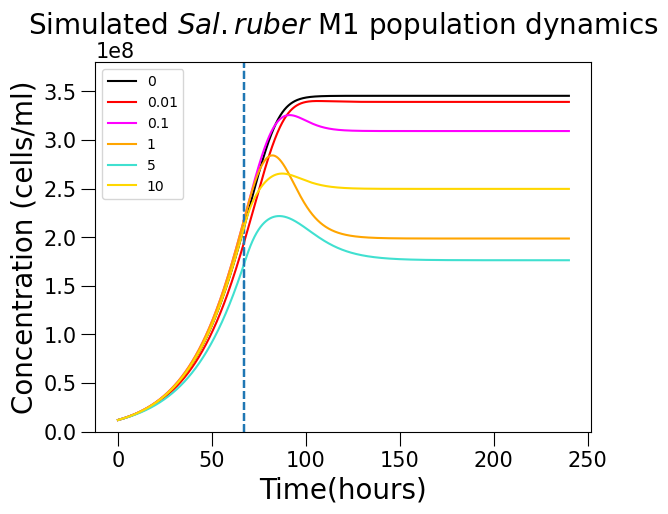

In [18]:
mu_max_vals=[0.06,0.055,0.061,0.061,0.058,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]
colors = ['black','red','fuchsia','orange','turquoise','gold']
mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
Rvals = []
Svals = []

Pf_finals = []
Pe_finals = []


Pe_dist_final=[]
Pf_dist_final = []
for b in range(len(mu_max_vals)):
    pars['mu_max'] = mu_max_vals[b]
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    Pe1_0 = y1[:,2]
    Pe_mid_0 = y1[:,3:(pars['n']+1)]
    Pe_final_0 = y1[:,(pars['n']+1)]
    Pf1_0 = y1[:,pars['n']+2]
    Pf_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]

    Pe_total_mid_0 = np.sum(Pe_mid_0, axis = 1)
    Pf_total_mid_0 = np.sum(Pf_mid_0, axis = 1)
    Pe_total_0 = np.sum([Pe1_0,Pe_total_mid_0,Pe_final_0], axis = 0)

    Pf_total_0 = np.sum([Pf1_0,Pf_total_mid_0,Pf_final_0], axis = 0)

    host_pop_0 = S_0 + Pe_total_0 + Pf_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+Pe+Pf+L')
    plt.axvline(virus_insert_time, linestyle = '--')
    plt.plot(t,host_pop_0, color = colors[b])
    Rvals.append(R_0[-1])
    Svals.append(S_0[-1])

    #######
    
    t0 = virus_insert_time
    tf = 240
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    BULK_MOI  = MOI_vals[b]
    y01[0] = Rvals[b] #initial resource concentration 
    y01[1] = Svals[b] #initial susceptible concentration 
    y01[-1] = BULK_MOI * y01[1] #initial free virus concentration 
    #print( y01[1])
    #print(MOI_vals[i])
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    
    R3= y1[:,0]
    S3 = y1[:,1]
    Pe13 = y1[:,2]
    Pe_mid3 = y1[:,3:(pars['n']+1)]
    Pe_final3 = y1[:,(pars['n']+1)]
    Pf13 = y1[:,pars['n']+2]
    Pf_mid3 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final3 = y1[:,2*pars['n'] + 1]
    V3=y1[:,(2*pars['n']+2)]

    Pe_total_mid3 = np.sum(Pe_mid3, axis = 1)
    Pf_total_mid3 = np.sum(Pf_mid3, axis = 1)
    Pe_total3 = np.sum([Pe13,Pe_total_mid3,Pe_final3], axis = 0)

    Pf_total3 = np.sum([Pf13,Pf_total_mid3,Pf_final3], axis = 0)

    host_pop3 = S3 + Pe_total3 + Pf_total3
    
    plt.plot(t,host_pop3, color = colors[b], label = str(BULK_MOI))
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')
    plt.title(r'Simulated $\it{Sal.ruber}$ M1 population dynamics', fontsize = 20)
    Pe_dist=[]
    Pf_dist = []
    Pe_dist.append(Pe13[-1])
    Pf_dist.append(Pf13[-1])
    for a in range(len(Pe_mid3[0])):
        Pe_dist.append(Pe_mid3[:,a][-1])
    for b in range(len(Pf_mid3[0])):
        Pf_dist.append(Pf_mid3[:,b][-1])
    Pe_dist.append(Pe_final3[-1])
    Pf_dist.append(Pf_final3[-1])
    Pe_dist_final.append(Pe_dist) 
    Pf_dist_final.append(Pf_dist) 
    
    Pf_finals.append(Pf_total3)
    Pe_finals.append(Pe_total3)
    
    plt.legend()
plt.ylim(0,3.8*10**8)
plt.savefig('Final_result.png')
plt.show()





### Fig 2a: Tracking the total infected (pseudolysogens) population over the experimental timeframe

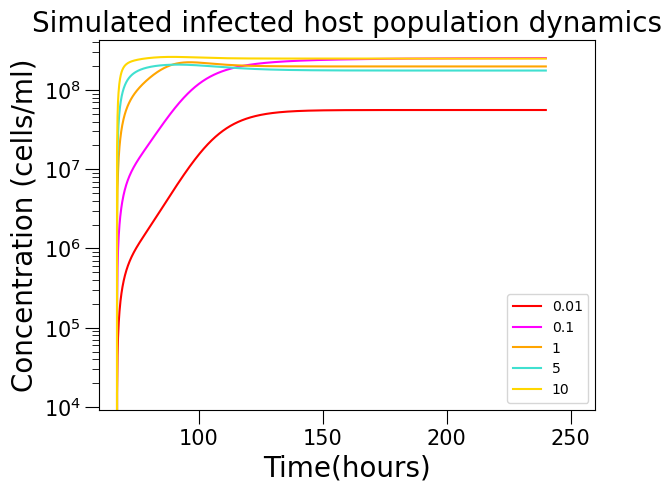

In [20]:

for i in (np.arange(5)+1):
    plt.semilogy(t,np.array(Pf_finals[i]).flatten()+np.array(Pe_finals[i]).flatten(), color = colors[i], label = MOI_vals[i])
    plt.xticks(range(0,260,50))
    plt.xlim(60,260)
    plt.ylabel("Concentration (cells/ml)")
    plt.xlabel("Time(hours)")
    plt.title("Simulated infected host population dynamics", fontsize = 20)
    plt.legend()
    plt.savefig('Infected.png', bbox_inches = "tight")
plt.show()

### Fig 2b: Distribution of superinfected pseudolysogens

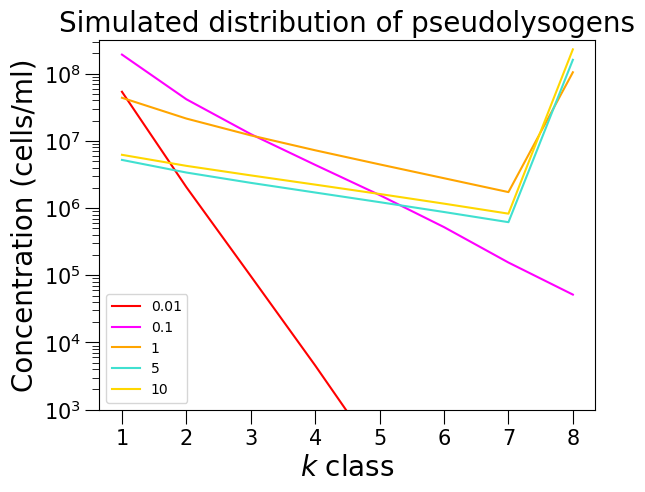

In [22]:
for i in (np.arange(5)+1):
    plt.semilogy(np.arange(1,len(Pf_dist_final[i])+1), np.add(Pe_dist_final[i],Pf_dist_final[i]), label = MOI_vals[i], color = colors[i])
    plt.xticks(range(1,9,1))
    plt.ylim(10**3,10**8.5)
  
    plt.title('Simulated distribution of pseudolysogens', fontsize = 20)
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel(r'$k$ class')
    plt.legend()

plt.savefig('P_dist_fin.pdf', bbox_inches = "tight")


## Viral Replication Model

In [24]:
def Model_3(y,t,pars):
    if pars['n'] == 0:
        return ('Need n>0 classes')
    if pars['n'] == 1:
        dy= np.zeros(5)
        R = y[0]
        S = y[1]
        E = y[2]
        I = y[3]
        V = y[4]
        
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim =1
        
        dy[0] = pars['J'] - pars['e']* psy_R*(S+E) #R
        dy[1] = psy_R * S  - pars['phi'][0] * S* V +psy_R*E + psy_R*I #S
        dy[2] = pars['phi'][0] * S* V  - pars['lam'][0]*E  #E
        dy[3] = pars['lam'][0]*E - psy_R_dim*(pars['eta'] * I) #I
        dy[4] = psy_R_dim*(pars['bet']*pars['eta'] * I) - (pars['phi'][0]*S + pars['phi'][0]*E)* V #V
        
        return dy  
    else:
        dy = np.zeros(2*pars['n']+3)
        R = y[0]
        S = y[1]
        Pe_1 = y[2]
        Pe_s = y[3:(pars['n']+1)]
        Pe_k = y[pars['n'] + 1]
        Pf_1 = y[pars['n']+2]
        Pf_s = y[(pars['n']+3):(2*pars['n']+1)]
        Pf_k = y[2*pars['n'] + 1]
        V = y[2*pars['n'] + 2]

        Pe_prev = np.concatenate((Pe_1 ,  Pe_s[0:-1]), axis = None)
        Pe_total = np.concatenate((Pe_1 ,  Pe_s, Pe_k), axis = None)
        
        Pe_sum = np.sum(Pe_total)
        
        Pf_prev = np.concatenate((Pf_1 ,  Pf_s[0:-1]), axis = None)
        Pf_total = np.concatenate((Pf_1 ,  Pf_s, Pf_k), axis = None)
        
        Pf_sum = np.sum(Pf_total)

 
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))

        Pe_topmid = np.concatenate((Pe_1 ,  Pe_s), axis = None)
        Pf_topmid = np.concatenate((Pf_1 ,  Pf_s), axis = None)
  
        
        
        lam_sum = np.sum(pars['lam'])


        dy[0] = pars['J'] - pars['e']* psy_R*(S +(1/(1-pars['alpha_p'])) * ((np.sum(Pe_total))+np.sum(Pf_total))) - pars['dR'] * R #R
        #print(pars['fin'][1:-1])
        #print(Pe_total)
     
        dy[1] = psy_R * S  - pars['phi'][0]  * S* V   + 2*pars['z']* psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*Pe_total)) + 2* pars['z'] * psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*Pf_total)) - pars['dS']*S # S

        dy[2] = pars['phi'][0] * S * V - pars['phi'][1] * Pe_1 * V  -  (pars['lam'][0] * Pe_1) - (psy_R)*Pe_1 + 1/(1-pars['alpha_p'])* 2*psy_R *( pars['z'] * np.sum(pars['fin'][0]*(Pe_total), axis = 0) + (1- pars['z']) * Pe_1)-  pars['dE'] * Pe_1  #Pe_1

        dy[3:(pars['n']+1)]  = pars['phi'][1:-2] * Pe_prev * V - pars['phi'][2:-1] * Pe_s * V -  (pars['lam'][1:-1] * Pe_s) -(psy_R)*Pe_s + 2*psy_R *( pars['z'] * np.sum(pars['fin'][1:-1]*Pe_total, axis = 1)/(1-pars['alpha_p']) + (1- pars['z']) * Pe_s)- pars['dE'] * Pe_s  # Pe_s
        
        dy[pars['n']+1]  = pars['phi'][-1] * Pe_topmid[-1]*V -  (pars['lam'][-1] * Pe_k) -  (psy_R)*Pe_k +  2*psy_R*(pars['z'] * np.sum(pars['fin'][-1]*(Pe_k), axis = 0)/(1-pars['alpha_p']) +  (1- pars['z']) * Pe_k )-  pars['dE'] * Pe_k  #Pe_K

        dy[pars['n']+2] = pars['lam'][0]*Pe_1 - psy_R_dim * (pars['eta'] * (Pf_1)) -  (psy_R)*Pf_1 + 1/(1-pars['alpha_p'])* 2*psy_R*(pars['z'] * np.sum(pars['fin'][0]*(Pf_total), axis = 0) + (1- pars['z']) * Pf_1) #Pf_1
        
        dy[(pars['n']+3):(2*pars['n']+1)] = (pars['lam'][1:-1] * Pe_s) - psy_R_dim * (pars['eta'] * (Pf_s)) - (psy_R)*Pf_s + 2*psy_R * ( pars['z'] * np.sum(pars['fin'][1:-1]*Pf_total, axis = 1)/(1-pars['alpha_p']) + (1- pars['z']) * Pf_s) #Pf_s
        
        dy[2*pars['n'] + 1]= pars['lam'][-1]*Pe_k - psy_R_dim * (pars['eta'] * (Pf_k)) -  (psy_R)*Pf_k +  2*psy_R* (pars['z']*np.sum(pars['fin'][-1]*(Pf_k), axis = 0)/(1-pars['alpha_p']) + (1- pars['z']) * Pf_k)#Pf_k
        
        dy[2*pars['n']+2] = pars['bet']*psy_R_dim * (pars['eta'] * (Pf_sum))- V*(pars['phi'][0] * S + np.sum(pars['phi'][2:-1] * Pe_prev) + pars['phi'][-1] * Pe_topmid[-1]) - pars['dV'] * V #V
        
 
        
        #print(np.sum(pars['bet']*I*pars['eta']))
        #print(psy_R)
        return dy  

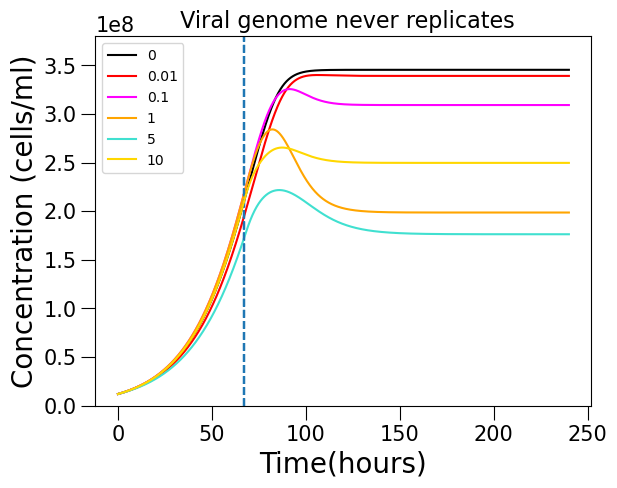

In [44]:
mu_max_vals=[0.06,0.055,0.061,0.061,0.058,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]
colors = ['black','red','fuchsia','orange','turquoise','gold']
mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
Rvals = []
Svals = []

Pf_finals = []
Pe_finals = []

pars['z'] =1
pars['sens']= 0.04

Pe_dist_final=[]
for b in range(len(mu_max_vals)):
    pars['mu_max'] = mu_max_vals[b]
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_3,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    Pe1_0 = y1[:,2]
    Pe_mid_0 = y1[:,3:(pars['n']+1)]
    Pe_final_0 = y1[:,(pars['n']+1)]
    Pf1_0 = y1[:,pars['n']+2]
    Pf_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]

    Pe_total_mid_0 = np.sum(Pe_mid_0, axis = 1)
    Pf_total_mid_0 = np.sum(Pf_mid_0, axis = 1)
    Pe_total_0 = np.sum([Pe1_0,Pe_total_mid_0,Pe_final_0], axis = 0)

    Pf_total_0 = np.sum([Pf1_0,Pf_total_mid_0,Pf_final_0], axis = 0)

    host_pop_0 = S_0 + Pe_total_0 + Pf_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+Pe+Pf+L')
    plt.axvline(virus_insert_time, linestyle = '--')
    plt.plot(t,host_pop_0, color = colors[b])
    Rvals.append(R_0[-1])
    Svals.append(S_0[-1])

    #######
    
    t0 = virus_insert_time
    tf = 240
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)

    y01 = np.zeros(2*pars['n']+3)
    BULK_MOI  = MOI_vals[b]
    y01[0] = Rvals[b] #initial resource concentration 
    y01[1] = Svals[b] #initial susceptible concentration 
    y01[-1] = BULK_MOI * y01[1] #initial free virus concentration 
    #print( y01[1])
    #print(MOI_vals[i])
    y1 = integrate.odeint(Model_3,y01,t,atol = 10**-8,args=(pars,))
    
    R3= y1[:,0]
    S3 = y1[:,1]
    Pe13 = y1[:,2]
    Pe_mid3 = y1[:,3:(pars['n']+1)]
    Pe_final3 = y1[:,(pars['n']+1)]
    Pf13 = y1[:,pars['n']+2]
    Pf_mid3 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    Pf_final3 = y1[:,2*pars['n'] + 1]
    V3=y1[:,(2*pars['n']+2)]

    Pe_total_mid3 = np.sum(Pe_mid3, axis = 1)
    Pf_total_mid3 = np.sum(Pf_mid3, axis = 1)
    Pe_total3 = np.sum([Pe13,Pe_total_mid3,Pe_final3], axis = 0)

    Pf_total3 = np.sum([Pf13,Pf_total_mid3,Pf_final3], axis = 0)

    host_pop3 = S3 + Pe_total3 + Pf_total3
    
    plt.plot(t,host_pop3, color = colors[b], label = str(BULK_MOI))
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')
    if pars['z'] == 1:
        gens = ' Viral genome never replicates'
    elif pars['z'] == 0:
        gens = ' Viral genome replicates every generation'
    else:
        gens =  'Viral genome replicates every '  + str(round(1/(1-pars['z']),2)) + ' generations'
    plt.title(gens , fontsize = 16)
    Pe_dist=[]
    Pe_dist.append(Pe13[-1])
    for a in range(len(Pe_mid3[0])):
        Pe_dist.append(Pe_mid3[:,a][-1])
    Pe_dist.append(Pe_final3[-1])
    Pe_dist_final.append(Pe_dist) 
    plt.legend()
    
    Pf_finals.append(Pf_total3)
    Pe_finals.append(Pe_total3)
plt.ylim(0,3.8*10**8)
plt.savefig('Replication.svg', bbox_inches = "tight")
plt.show()



